# Pandas: Fundamentos para Análisis de Datos

## Objetivos de Aprendizaje
- Dominar las estructuras de datos de Pandas (Series y DataFrame)
- Realizar operaciones de lectura y escritura de datos
- Manipular y transformar DataFrames eficientemente
- Aplicar filtros, agrupaciones y agregaciones
- Trabajar con datos faltantes y duplicados

## Requisitos
- Python 3.8+
- pandas
- numpy

### 📖 Importando Pandas - La Biblioteca Más Importante

**¿Qué es pandas?**
Pandas es **LA biblioteca fundamental** para Data Engineering y Data Science en Python. Es como tener:
- Excel con superpoderes
- SQL dentro de Python
- Herramientas de análisis de datos profesionales

**¿Por qué `import pandas as pd`?**
- **`pd` es el alias universal**: TODO el mundo lo usa
- **Convenio establecido**: Como `import numpy as np`
- **Más rápido de escribir**: `pd.DataFrame()` vs `pandas.DataFrame()`

**¿Qué puedes hacer con pandas?**
1. **Leer datos**: CSV, Excel, JSON, SQL, Parquet, HTML
2. **Manipular**: Filtrar, transformar, agrupar, pivotar
3. **Limpiar**: Manejar nulos, duplicados, tipos de datos
4. **Analizar**: Estadísticas, agregaciones, series temporales
5. **Exportar**: Guardar en múltiples formatos

**Estructuras principales:**

| Estructura | Dimensión | Descripción | Analogía |
|------------|-----------|-------------|----------|
| **Series** | 1D | Array etiquetado | Una columna de Excel |
| **DataFrame** | 2D | Tabla con filas y columnas | Hoja de Excel completa |

**En este bloque:**
Simplemente importamos pandas con el alias estándar `pd`. Esto hace que toda la funcionalidad de pandas esté disponible en tu notebook.

In [1]:
# Instalación de dependencias
import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn -q


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\Luis\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### 📖 Series - La Estructura 1D de Pandas

**¿Qué es una Series?**
Es un **array unidimensional etiquetado** - como una columna de Excel con esteroides:
- Tiene **valores** (los datos)
- Tiene **índice** (etiquetas para cada valor)
- Tiene **tipo de dato** homogéneo (todos int, todos float, etc.)

**Diferencias clave con listas de Python:**

| Característica | Lista Python | Pandas Series |
|----------------|--------------|---------------|
| Índice | Numérico solo (0, 1, 2...) | Cualquier cosa (nombres, fechas, etc.) |
| Tipos | Mixtos | Homogéneo (optimizado) |
| Operaciones vectorizadas | ❌ No | ✅ Sí (súper rápido) |
| Métodos estadísticos | ❌ No | ✅ mean(), std(), etc. |

**Anatomía de una Series:**
```python
s = pd.Series([10, 20, 30, 40])

# Tiene 3 componentes:
# 1. Valores: [10, 20, 30, 40]
# 2. Índice: [0, 1, 2, 3] (auto-generado)
# 3. Tipo: dtype('int64')
```

**Visualización:**
```
0    10     ← índice 0, valor 10
1    20     ← índice 1, valor 20
2    30     ← índice 2, valor 30
3    40     ← índice 3, valor 40
dtype: int64
```

**Creación básica:**
```python
# Desde lista
s = pd.Series([1, 2, 3, 4, 5])

# Desde diccionario (las claves se vuelven índice)
s = pd.Series({'a': 100, 'b': 200, 'c': 300})

# Con índice personalizado
s = pd.Series([10, 20, 30], index=['x', 'y', 'z'])
```

**¿Cuándo usar Series?**
- Representar **una columna** de datos
- Trabajar con **series temporales** (precios de acciones)
- Operar sobre **un atributo** (edades, salarios, etc.)

**En este bloque verás:**
1. Crear Series desde listas simples
2. Acceder a valores con índice numérico
3. La estructura básica: valores + índice + dtype

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Configuración
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')

print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Pandas version: 2.3.3
NumPy version: 2.3.3


## 1. Series de Pandas

Una Series es un array unidimensional etiquetado.

### 📖 DataFrames - Tablas con Superpoderes

**¿Qué es un DataFrame?**
Es la **estructura 2D** (filas × columnas) más importante de pandas:
- Piensa en una **hoja de Excel**
- O una **tabla SQL**
- Cada columna es una Series
- Cada fila es un registro

**Anatomía de un DataFrame:**
```
       nombre  edad  ciudad      ← Columnas (headers)
    ┌──────────────────────────
  0 │ Ana      25    Madrid     ← Fila 0 (índice)
  1 │ Luis     30    Barcelona  ← Fila 1
  2 │ Carlos   28    Valencia   ← Fila 2
    └
    ↑
  Índice
```

**Formas de crear un DataFrame:**

**1. Desde diccionario de listas (COMÚN - orientado a columnas):**
```python
data = {
    'nombre': ['Ana', 'Luis', 'Carlos'],
    'edad': [25, 30, 28]
}
df = pd.DataFrame(data)
```

**2. Desde lista de diccionarios (orientado a filas):**
```python
data = [
    {'nombre': 'Ana', 'edad': 25},
    {'nombre': 'Luis', 'edad': 30}
]
df = pd.DataFrame(data)
```

**3. Desde archivo (CSV, Excel, JSON, SQL, etc.):**
```python
df = pd.read_csv('datos.csv')
df = pd.read_excel('datos.xlsx')
df = pd.read_json('datos.json')
df = pd.read_sql('SELECT * FROM tabla', conexion)
```

**Componentes de un DataFrame:**
- **Columnas**: Atributos/características (nombre, edad, precio, etc.)
- **Índice**: Identificador de cada fila (0, 1, 2... o personalizado)
- **Valores**: Los datos en sí
- **dtype por columna**: Cada columna tiene su tipo (int, float, object, datetime)

**Propiedades útiles:**
```python
df.shape         # (num_filas, num_columnas)
df.columns       # Nombres de columnas
df.index         # Índice
df.dtypes        # Tipos de datos por columna
df.size          # Total de celdas
df.ndim          # Dimensiones (siempre 2)
```

**En este bloque aprenderás:**
1. Crear DataFrames desde diccionarios
2. Entender la estructura tabular
3. Ver índice automático vs personalizado
4. La relación entre diccionarios Python y DataFrames

In [3]:
# Crear una Series desde una lista
ventas = pd.Series([100, 150, 200, 175, 225], name='ventas_diarias')
print("Series básica:")
print(ventas)
print(f"\nTipo: {type(ventas)}")
print(f"Shape: {ventas.shape}")
print(f"Dtype: {ventas.dtype}")

Series básica:
0    100
1    150
2    200
3    175
4    225
Name: ventas_diarias, dtype: int64

Tipo: <class 'pandas.core.series.Series'>
Shape: (5,)
Dtype: int64


In [4]:
# Series con índice personalizado
temperaturas = pd.Series(
    data=[22, 25, 28, 26, 24],
    index=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes'],
    name='temperatura_celsius'
)
print("Series con índice personalizado:")
print(temperaturas)
print(f"\nAcceso por índice: Miércoles = {temperaturas['Miércoles']}°C")

Series con índice personalizado:
Lunes        22
Martes       25
Miércoles    28
Jueves       26
Viernes      24
Name: temperatura_celsius, dtype: int64

Acceso por índice: Miércoles = 28°C


In [5]:
# Operaciones con Series
print("Estadísticas descriptivas:")
print(f"Media: {temperaturas.mean():.2f}°C")
print(f"Mediana: {temperaturas.median()}°C")
print(f"Desviación estándar: {temperaturas.std():.2f}°C")
print(f"Mínimo: {temperaturas.min()}°C")
print(f"Máximo: {temperaturas.max()}°C")

Estadísticas descriptivas:
Media: 25.00°C
Mediana: 25.0°C
Desviación estándar: 2.24°C
Mínimo: 22°C
Máximo: 28°C


## 2. DataFrames: La estructura principal

Un DataFrame es una estructura bidimensional con columnas que pueden ser de diferentes tipos.

### 📖 Selección de Datos - Accediendo a lo que Necesitas

**¿Por qué es importante?**
En Data Engineering, rara vez trabajas con TODO el dataset:
- Necesitas **columnas específicas** para análisis
- Filtras **filas que cumplen condiciones**
- Extraes **un subconjunto** para procesar

**4 formas principales de seleccionar:**

**1. Por nombre de columna:**
```python
df['nombre']           # Una columna → Series
df[['nombre', 'edad']] # Múltiples columnas → DataFrame
```

**2. Con `.loc[]` (label-based - por etiqueta):**
```python
df.loc[0]              # Fila con índice 0
df.loc[0:2]            # Filas 0, 1, 2 (inclusivo!)
df.loc[0, 'nombre']    # Celda específica
```

**3. Con `.iloc[]` (integer position-based - por posición):**
```python
df.iloc[0]             # Primera fila
df.iloc[0:2]           # Filas 0, 1 (exclusivo!)
df.iloc[0, 1]          # Fila 0, columna 1
```

**4. Filtrado booleano:**
```python
df[df['edad'] > 25]    # Filas donde edad > 25
```

**Diferencia clave loc vs iloc:**

| Aspecto | `.loc[]` | `.iloc[]` |
|---------|----------|-----------|
| Tipo | Basado en etiquetas | Basado en posición |
| Índice | Usa nombres/índice | Usa números (0, 1, 2...) |
| Slicing | Inclusivo `[0:2]` incluye 2 | Exclusivo `[0:2]` excluye 2 |
| Ejemplo | `df.loc['fila_A']` | `df.iloc[0]` |

**En este bloque verás:**
1. Seleccionar una columna con `df['columna']`
2. Seleccionar múltiples columnas con doble corchete
3. Usar `.loc[]` para acceso por etiqueta
4. Usar `.iloc[]` para acceso por posición numérica
5. La diferencia sutil pero importante entre ambos

In [6]:
# Crear DataFrame desde diccionario
datos_ventas = {
    'producto': ['Laptop', 'Mouse', 'Teclado', 'Monitor', 'Webcam'],
    'cantidad': [5, 25, 15, 8, 12],
    'precio_unitario': [1200, 25, 75, 300, 80],
    'categoria': ['Computadoras', 'Accesorios', 'Accesorios', 'Computadoras', 'Accesorios']
}

df_ventas = pd.DataFrame(datos_ventas)
print("DataFrame de ventas:")
print(df_ventas)

DataFrame de ventas:
  producto  cantidad  precio_unitario     categoria
0   Laptop         5             1200  Computadoras
1    Mouse        25               25    Accesorios
2  Teclado        15               75    Accesorios
3  Monitor         8              300  Computadoras
4   Webcam        12               80    Accesorios


In [7]:
# Información del DataFrame
print("Información del DataFrame:")
print(f"Shape: {df_ventas.shape}")
print(f"Columnas: {df_ventas.columns.tolist()}")
print(f"\nTipos de datos:")
print(df_ventas.dtypes)
print(f"\nInformación detallada:")
df_ventas.info()

Información del DataFrame:
Shape: (5, 4)
Columnas: ['producto', 'cantidad', 'precio_unitario', 'categoria']

Tipos de datos:
producto           object
cantidad            int64
precio_unitario     int64
categoria          object
dtype: object

Información detallada:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   producto         5 non-null      object
 1   cantidad         5 non-null      int64 
 2   precio_unitario  5 non-null      int64 
 3   categoria        5 non-null      object
dtypes: int64(2), object(2)
memory usage: 292.0+ bytes


In [8]:
# Crear nueva columna calculada
df_ventas['total_venta'] = df_ventas['cantidad'] * df_ventas['precio_unitario']
print("DataFrame con columna calculada:")
print(df_ventas)

DataFrame con columna calculada:
  producto  cantidad  precio_unitario     categoria  total_venta
0   Laptop         5             1200  Computadoras         6000
1    Mouse        25               25    Accesorios          625
2  Teclado        15               75    Accesorios         1125
3  Monitor         8              300  Computadoras         2400
4   Webcam        12               80    Accesorios          960


In [9]:
# Estadísticas descriptivas
print("Estadísticas del DataFrame:")
print(df_ventas.describe())

Estadísticas del DataFrame:
        cantidad  precio_unitario  total_venta
count   5.000000         5.000000     5.000000
mean   13.000000       336.000000  2222.000000
std     7.713624       494.512386  2216.496673
min     5.000000        25.000000   625.000000
25%     8.000000        75.000000   960.000000
50%    12.000000        80.000000  1125.000000
75%    15.000000       300.000000  2400.000000
max    25.000000      1200.000000  6000.000000


## 3. Selección y Filtrado de Datos

### 📖 Filtrado Booleano - El Poder de las Condiciones

**¿Qué es el filtrado booleano?**
Es usar **condiciones lógicas** para seleccionar solo las filas que cumplen criterios:
- ¿Clientes mayores de 18 años?
- ¿Ventas superiores a $1000?
- ¿Productos en stock?

**Sintaxis básica:**
```python
df[df['columna'] > valor]
```

**Cómo funciona (paso a paso):**
```python
# 1. La condición crea una Series booleana
df['edad'] > 25
# Retorna: [False, True, True, False...]

# 2. Esa Series se usa como máscara
df[df['edad'] > 25]
# Solo las filas donde es True pasan
```

**Operadores de comparación:**

| Operador | Significado | Ejemplo |
|----------|-------------|---------|
| `==` | Igual a | `df['ciudad'] == 'Madrid'` |
| `!=` | Diferente de | `df['status'] != 'activo'` |
| `>` | Mayor que | `df['precio'] > 100` |
| `<` | Menor que | `df['stock'] < 10` |
| `>=` | Mayor o igual | `df['edad'] >= 18` |
| `<=` | Menor o igual | `df['descuento'] <= 0.5` |

**Filtros compuestos (múltiples condiciones):**

**AND (ambas deben cumplirse):**
```python
df[(df['edad'] > 25) & (df['ciudad'] == 'Madrid')]
```

**OR (al menos una debe cumplirse):**
```python
df[(df['edad'] > 60) | (df['edad'] < 18)]
```

**NOT (negación):**
```python
df[~(df['ciudad'] == 'Madrid')]  # Todo menos Madrid
```

**⚠️ IMPORTANTE:**
- Usa `&` (AND) y `|` (OR), NO `and` y `or`
- Envuelve cada condición en paréntesis: `(condicion1) & (condicion2)`

**Métodos útiles con strings:**
```python
# Contiene substring
df[df['nombre'].str.contains('Ana')]

# Empieza con
df[df['email'].str.startswith('admin')]

# Está en lista
df[df['ciudad'].isin(['Madrid', 'Barcelona'])]
```

**En este bloque aprenderás:**
1. Crear condiciones booleanas con operadores de comparación
2. Usar `&` (AND) y `|` (OR) para combinar condiciones
3. El método `.isin()` para buscar en listas
4. Por qué necesitas paréntesis en filtros compuestos
5. Cómo funcionan las máscaras booleanas internamente

In [10]:
# Seleccionar columnas
print("Selección de una columna:")
print(df_ventas['producto'])
print(f"\nTipo: {type(df_ventas['producto'])}")

print("\nSelección de múltiples columnas:")
print(df_ventas[['producto', 'total_venta']])

Selección de una columna:
0     Laptop
1      Mouse
2    Teclado
3    Monitor
4     Webcam
Name: producto, dtype: object

Tipo: <class 'pandas.core.series.Series'>

Selección de múltiples columnas:
  producto  total_venta
0   Laptop         6000
1    Mouse          625
2  Teclado         1125
3  Monitor         2400
4   Webcam          960


In [11]:
# Filtrado con condiciones
print("Productos con ventas mayores a $1000:")
ventas_altas = df_ventas[df_ventas['total_venta'] > 1000]
print(ventas_altas)

print("\nProductos de categoría 'Accesorios':")
accesorios = df_ventas[df_ventas['categoria'] == 'Accesorios']
print(accesorios)

Productos con ventas mayores a $1000:
  producto  cantidad  precio_unitario     categoria  total_venta
0   Laptop         5             1200  Computadoras         6000
2  Teclado        15               75    Accesorios         1125
3  Monitor         8              300  Computadoras         2400

Productos de categoría 'Accesorios':
  producto  cantidad  precio_unitario   categoria  total_venta
1    Mouse        25               25  Accesorios          625
2  Teclado        15               75  Accesorios         1125
4   Webcam        12               80  Accesorios          960


In [12]:
# Filtrado con múltiples condiciones
print("Accesorios con ventas mayores a $500:")
filtro_complejo = df_ventas[
    (df_ventas['categoria'] == 'Accesorios') & 
    (df_ventas['total_venta'] > 500)
]
print(filtro_complejo)

Accesorios con ventas mayores a $500:
  producto  cantidad  precio_unitario   categoria  total_venta
1    Mouse        25               25  Accesorios          625
2  Teclado        15               75  Accesorios         1125
4   Webcam        12               80  Accesorios          960


In [13]:
# Uso de loc e iloc
print("Uso de loc (etiquetas):")
print(df_ventas.loc[0:2, ['producto', 'cantidad']])

print("\nUso de iloc (posiciones):")
print(df_ventas.iloc[0:3, 0:2])

Uso de loc (etiquetas):
  producto  cantidad
0   Laptop         5
1    Mouse        25
2  Teclado        15

Uso de iloc (posiciones):
  producto  cantidad
0   Laptop         5
1    Mouse        25
2  Teclado        15


## 4. Agrupaciones y Agregaciones

### 📖 Operaciones con Columnas - Transformando Datos

**¿Por qué crear nuevas columnas?**
Los datos crudos rara vez tienen TODO lo que necesitas:
- Calcular **métricas derivadas** (total = cantidad × precio)
- Aplicar **reglas de negocio** (descuento si precio > 100)
- Crear **categorías** (edad → 'joven', 'adulto', 'senior')
- Convertir **unidades** (temperatura °C → °F)

**Formas de crear columnas:**

**1. Operaciones aritméticas:**
```python
df['total'] = df['cantidad'] * df['precio']
df['precio_con_iva'] = df['precio'] * 1.21
```

**2. Operaciones condicionales (np.where):**
```python
df['categoria'] = np.where(df['edad'] < 18, 'Menor', 'Adulto')
# Si edad < 18 → 'Menor', si no → 'Adulto'
```

**3. Apply con funciones:**
```python
df['nombre_upper'] = df['nombre'].apply(lambda x: x.upper())
```

**4. Operaciones entre columnas:**
```python
df['diferencia'] = df['precio_venta'] - df['costo']
df['margen'] = (df['diferencia'] / df['precio_venta']) * 100
```

**Operadores soportados:**
- `+` Suma
- `-` Resta
- `*` Multiplicación
- `/` División
- `**` Potencia
- `%` Módulo
- `//` División entera

**Modificar columnas existentes:**
```python
# Reemplazar valores
df['precio'] = df['precio'] * 1.1  # Aumentar 10%

# Renombrar
df = df.rename(columns={'nombre': 'nombre_cliente'})

# Eliminar
df = df.drop(columns=['columna_innecesaria'])
```

**En este bloque verás:**
1. Crear columnas con operaciones aritméticas simples
2. Usar `np.where()` para lógica condicional (if-else)
3. Sintaxis: `np.where(condicion, valor_si_true, valor_si_false)`
4. Aplicar transformaciones a todas las filas simultáneamente
5. Por qué pandas es vectorizado (no necesitas loops)

In [14]:
# Crear dataset más grande para agrupaciones
np.random.seed(42)
n_registros = 100

df_transacciones = pd.DataFrame({
    'fecha': pd.date_range('2024-01-01', periods=n_registros, freq='D'),
    'categoria': np.random.choice(['Electrónica', 'Ropa', 'Alimentos', 'Hogar'], n_registros),
    'producto': [f'Producto_{i}' for i in range(n_registros)],
    'cantidad': np.random.randint(1, 20, n_registros),
    'precio': np.random.uniform(10, 500, n_registros).round(2),
    'region': np.random.choice(['Norte', 'Sur', 'Este', 'Oeste'], n_registros)
})

df_transacciones['total'] = df_transacciones['cantidad'] * df_transacciones['precio']

print("Dataset de transacciones:")
print(df_transacciones.head(10))

Dataset de transacciones:
       fecha    categoria    producto  cantidad  precio region    total
0 2024-01-01    Alimentos  Producto_0        18  207.88  Oeste  3741.84
1 2024-01-02        Hogar  Producto_1        12   41.80  Norte   501.60
2 2024-01-03  Electrónica  Producto_2         2  134.42  Oeste   268.84
3 2024-01-04    Alimentos  Producto_3        10  130.97  Norte  1309.70
4 2024-01-05    Alimentos  Producto_4         4  351.19  Oeste  1404.76
5 2024-01-06        Hogar  Producto_5        14  359.01  Oeste  5026.14
6 2024-01-07  Electrónica  Producto_6        16   82.56    Sur  1320.96
7 2024-01-08  Electrónica  Producto_7        15  498.89  Norte  7483.35
8 2024-01-09    Alimentos  Producto_8         8  140.72    Sur  1125.76
9 2024-01-10         Ropa  Producto_9        14  488.54  Norte  6839.56


In [15]:
# Agrupación simple
print("Ventas totales por categoría:")
ventas_por_categoria = df_transacciones.groupby('categoria')['total'].sum()
print(ventas_por_categoria)
print(f"\nTipo: {type(ventas_por_categoria)}")

Ventas totales por categoría:
categoria
Alimentos      51260.17
Electrónica    55986.52
Hogar          61424.52
Ropa           98104.97
Name: total, dtype: float64

Tipo: <class 'pandas.core.series.Series'>


In [16]:
# Múltiples agregaciones
print("Estadísticas por categoría:")
stats_categoria = df_transacciones.groupby('categoria')['total'].agg([
    ('total_ventas', 'sum'),
    ('promedio', 'mean'),
    ('num_transacciones', 'count'),
    ('max_venta', 'max')
])
print(stats_categoria)

Estadísticas por categoría:
             total_ventas     promedio  num_transacciones  max_venta
categoria                                                           
Alimentos        51260.17  2135.840417                 24    6974.24
Electrónica      55986.52  2799.326000                 20    8112.05
Hogar            61424.52  2047.484000                 30    5153.25
Ropa             98104.97  3773.268077                 26    9448.32


In [17]:
# Agrupación por múltiples columnas
print("Ventas por categoría y región:")
ventas_categoria_region = df_transacciones.groupby(['categoria', 'region'])['total'].sum()
print(ventas_categoria_region)

Ventas por categoría y región:
categoria    region
Alimentos    Este       2262.19
             Norte     10312.88
             Oeste     15787.51
             Sur       22897.59
Electrónica  Este      20718.04
             Norte     21334.74
             Oeste      4850.04
             Sur        9083.70
Hogar        Este       5330.22
             Norte     19278.99
             Oeste     22036.31
             Sur       14779.00
Ropa         Este      22223.95
             Norte     38658.09
             Oeste     14322.51
             Sur       22900.42
Name: total, dtype: float64


In [18]:
# Usar pivot_table para análisis multidimensional
print("Tabla dinámica: Ventas por categoría y región:")
pivot_ventas = df_transacciones.pivot_table(
    values='total',
    index='categoria',
    columns='region',
    aggfunc='sum',
    fill_value=0
)
print(pivot_ventas)

Tabla dinámica: Ventas por categoría y región:
region           Este     Norte     Oeste       Sur
categoria                                          
Alimentos     2262.19  10312.88  15787.51  22897.59
Electrónica  20718.04  21334.74   4850.04   9083.70
Hogar         5330.22  19278.99  22036.31  14779.00
Ropa         22223.95  38658.09  14322.51  22900.42


## 5. Manejo de Datos Faltantes

### 📖 GroupBy - La Operación Más Poderosa de Pandas

**¿Qué es groupby?**
Es el equivalente de **GROUP BY en SQL** - agrupa filas por valores únicos de una columna:
- Ventas **por región**
- Salarios **por departamento**
- Usuarios **por país**

**Patrón split-apply-combine:**
```
Original DataFrame:
región    ventas
Norte     100
Norte     200
Sur       150
Sur       250

⬇️ SPLIT (agrupar por región)

Grupo Norte: [100, 200]
Grupo Sur:   [150, 250]

⬇️ APPLY (aplicar función, ej: sum)

Norte: 300
Sur:   400

⬇️ COMBINE (combinar resultados)

región    ventas
Norte     300
Sur       400
```

**Sintaxis básica:**
```python
df.groupby('columna')['columna_a_agregar'].funcion()
```

**Desglose:**
1. `df.groupby('region')` → Agrupa por región
2. `['total']` → Selecciona columna a operar
3. `.sum()` → Aplica función de agregación

**Funciones de agregación comunes:**

| Función | Qué hace | Ejemplo de uso |
|---------|----------|----------------|
| `.sum()` | Suma total | Ingresos totales |
| `.mean()` | Promedio | Salario promedio |
| `.median()` | Mediana | Precio típico |
| `.count()` | Cantidad | Número de transacciones |
| `.min()` | Mínimo | Venta más baja |
| `.max()` | Máximo | Venta más alta |
| `.std()` | Desviación estándar | Variabilidad |
| `.var()` | Varianza | Dispersión |
| `.size()` | Tamaño de grupo | Filas por grupo |

**Agrupar por múltiples columnas:**
```python
df.groupby(['region', 'categoria'])['total'].sum()
```

**Aplicar múltiples funciones:**
```python
df.groupby('region')['total'].agg(['sum', 'mean', 'count'])
```

**Casos de uso en Data Engineering:**
1. **Reportes por dimensión**: Ventas por mes, producto, región
2. **Cálculo de KPIs**: AOV (Average Order Value) por segmento
3. **Detección de anomalías**: Comparar grupos para encontrar outliers
4. **Feature engineering**: Crear características agregadas para ML
5. **Data quality**: Contar registros por categoría

**En este bloque aprenderás:**
1. Usar `groupby()` para agrupar por una columna
2. Aplicar funciones de agregación (sum, mean, count)
3. Agrupar por múltiples columnas simultáneamente
4. El patrón split-apply-combine
5. Diferencia entre `.size()` y `.count()`
6. Usar `.agg()` para aplicar múltiples funciones

In [19]:
# Crear DataFrame con valores faltantes
datos_clientes = {
    'id': [1, 2, 3, 4, 5, 6],
    'nombre': ['Juan', 'María', 'Pedro', None, 'Ana', 'Luis'],
    'edad': [25, 30, None, 28, 35, None],
    'email': ['juan@mail.com', None, 'pedro@mail.com', 'carlos@mail.com', None, 'luis@mail.com'],
    'salario': [50000, 60000, 55000, None, 70000, 48000]
}

df_clientes = pd.DataFrame(datos_clientes)
print("DataFrame con valores faltantes:")
print(df_clientes)

DataFrame con valores faltantes:
   id nombre  edad            email  salario
0   1   Juan  25.0    juan@mail.com  50000.0
1   2  María  30.0             None  60000.0
2   3  Pedro   NaN   pedro@mail.com  55000.0
3   4   None  28.0  carlos@mail.com      NaN
4   5    Ana  35.0             None  70000.0
5   6   Luis   NaN    luis@mail.com  48000.0


In [20]:
# Detectar valores faltantes
print("Valores nulos por columna:")
print(df_clientes.isnull().sum())

print("\nPorcentaje de valores nulos:")
print((df_clientes.isnull().sum() / len(df_clientes) * 100).round(2))

Valores nulos por columna:
id         0
nombre     1
edad       2
email      2
salario    1
dtype: int64

Porcentaje de valores nulos:
id          0.00
nombre     16.67
edad       33.33
email      33.33
salario    16.67
dtype: float64


In [21]:
# Eliminar filas con valores faltantes
df_sin_nulos = df_clientes.dropna()
print(f"Filas originales: {len(df_clientes)}")
print(f"Filas después de dropna(): {len(df_sin_nulos)}")
print("\nDataFrame sin nulos:")
print(df_sin_nulos)

Filas originales: 6
Filas después de dropna(): 1

DataFrame sin nulos:
   id nombre  edad          email  salario
0   1   Juan  25.0  juan@mail.com  50000.0


In [36]:
# Rellenar valores faltantes
df_rellenado = df_clientes.copy()

# Rellenar edad con la media (sintaxis moderna)
df_rellenado['edad'] = df_rellenado['edad'].fillna(df_rellenado['edad'].mean())

# Rellenar nombre con un valor por defecto
df_rellenado['nombre'] = df_rellenado['nombre'].fillna('Desconocido')

# Rellenar email con un valor específico
df_rellenado['email'] = df_rellenado['email'].fillna('sin_email@ejemplo.com')

# Rellenar salario con la mediana
df_rellenado['salario'] = df_rellenado['salario'].fillna(df_rellenado['salario'].median())

print("DataFrame con valores imputados:")
print(df_rellenado)

DataFrame con valores imputados:
   id       nombre  edad                  email  salario
0   1         Juan  25.0          juan@mail.com  50000.0
1   2        María  30.0  sin_email@ejemplo.com  60000.0
2   3        Pedro  29.5         pedro@mail.com  55000.0
3   4  Desconocido  28.0        carlos@mail.com  55000.0
4   5          Ana  35.0  sin_email@ejemplo.com  70000.0
5   6         Luis  29.5          luis@mail.com  48000.0


## 6. Manejo de Duplicados

### 📖 Datos Faltantes (NaN) - El Enemigo Silencioso

**¿Qué son los valores nulos?**
Son **ausencias de datos** representadas como `NaN` (Not a Number) o `None`:
- Campos opcionales no completados (teléfono, dirección)
- Errores en recolección (sensor desconectado)
- Joins que no hicieron match
- Datos históricos perdidos

**¿Por qué son problemáticos?**
- **Rompen cálculos**: `sum([1, 2, NaN])` puede dar resultados inesperados
- **Sesgan estadísticas**: `mean()` ignora NaN pero cambia el denominador
- **Fallan modelos ML**: La mayoría NO acepta NaN
- **Errores en producción**: Código asume valores presentes

**Detectar valores nulos:**

```python
# Por celda
df.isnull()        # True donde hay NaN
df.notnull()       # True donde NO hay NaN

# Por columna (cuántos nulos)
df.isnull().sum()

# Filas con algún nulo
df[df.isnull().any(axis=1)]

# Porcentaje de nulos
(df.isnull().sum() / len(df)) * 100
```

**Estrategias de manejo:**

**1. Eliminar (dropna):**
```python
# Eliminar filas con algún NaN
df.dropna()

# Eliminar filas donde TODAS las columnas sean NaN
df.dropna(how='all')

# Eliminar columnas con algún NaN
df.dropna(axis=1)

# Eliminar solo si hay NaN en columnas específicas
df.dropna(subset=['edad', 'salario'])
```

**⚠️ Cuidado:** Si tienes 1000 filas y 10 tienen NaN, ¿vale la pena perder el 1%?

**2. Rellenar (fillna):**
```python
# Con un valor constante
df.fillna(0)

# Con la media (para numéricos)
df['edad'].fillna(df['edad'].mean())

# Con la mediana (resistente a outliers)
df['salario'].fillna(df['salario'].median())

# Con la moda (más frecuente)
df['ciudad'].fillna(df['ciudad'].mode()[0])

# Forward fill (llevar valor anterior)
df.fillna(method='ffill')

# Backward fill (traer valor siguiente)
df.fillna(method='bfill')
```

**3. Imputación avanzada:**
```python
# Por grupo
df['salario'] = df.groupby('departamento')['salario'].transform(
    lambda x: x.fillna(x.mean())
)
```

**¿Cuándo usar cada estrategia?**

| Estrategia | Cuándo usarla | Ejemplo |
|------------|---------------|---------|
| **Eliminar** | Pocos nulos (<5%), campo obligatorio | ID, fecha de transacción |
| **Rellenar con 0** | Ausencia = cero | Descuento aplicado |
| **Rellenar con media/mediana** | Numéricos, distribución normal | Edad, salario |
| **Rellenar con moda** | Categóricos | Ciudad, categoría |
| **Forward/Backward fill** | Series temporales | Precio de acciones |
| **Dejar** | Ausencia es informativa | Fecha de cancelación |

**Validación post-procesamiento:**
```python
# Verificar que no quedan nulos
assert df.isnull().sum().sum() == 0, "¡Aún hay nulos!"
```

**En este bloque aprenderás:**
1. Detectar nulos con `isnull()` y contar con `.sum()`
2. Eliminar filas/columnas con `dropna()`
3. Rellenar nulos con `fillna()`
4. Estrategias: valor constante, media, mediana, moda
5. Diferencia entre eliminar vs imputar
6. Parámetros de dropna: `how='all'`, `subset=[]`
7. Por qué la mediana es mejor que la media con outliers

In [23]:
# Crear DataFrame con duplicados
datos_duplicados = {
    'id': [1, 2, 3, 2, 4, 3, 5],
    'producto': ['A', 'B', 'C', 'B', 'D', 'C', 'E'],
    'cantidad': [10, 20, 15, 20, 25, 15, 30]
}

df_dup = pd.DataFrame(datos_duplicados)
print("DataFrame con duplicados:")
print(df_dup)

DataFrame con duplicados:
   id producto  cantidad
0   1        A        10
1   2        B        20
2   3        C        15
3   2        B        20
4   4        D        25
5   3        C        15
6   5        E        30


In [24]:
# Detectar duplicados
print("Filas duplicadas:")
print(df_dup[df_dup.duplicated()])

print(f"\nNúmero de duplicados: {df_dup.duplicated().sum()}")

Filas duplicadas:
   id producto  cantidad
3   2        B        20
5   3        C        15

Número de duplicados: 2


In [25]:
# Eliminar duplicados
df_sin_dup = df_dup.drop_duplicates()
print("DataFrame sin duplicados:")
print(df_sin_dup)
print(f"\nFilas originales: {len(df_dup)}")
print(f"Filas sin duplicados: {len(df_sin_dup)}")

DataFrame sin duplicados:
   id producto  cantidad
0   1        A        10
1   2        B        20
2   3        C        15
4   4        D        25
6   5        E        30

Filas originales: 7
Filas sin duplicados: 5


## 7. Ordenamiento de Datos

### 📖 Duplicados - Detectando Filas Repetidas

**¿Qué son duplicados?**
Son **filas idénticas** (o idénticas en ciertas columnas) que aparecen múltiples veces:
- Errores en importación (archivo procesado dos veces)
- Bugs en aplicaciones (mismo registro insertado múltiples veces)
- Falta de constraints en BD (sin PRIMARY KEY)
- Merges incorrectos (joins mal hechos)

**¿Por qué son problemáticos?**
- **Sesgan análisis**: Contar "clientes únicos" da resultados incorrectos
- **Inflan métricas**: Ventas totales duplicadas
- **Desperdiciar recursos**: Procesar mismo dato múltiples veces
- **Violan integridad**: Un usuario no debería tener 2 IDs

**Detectar duplicados:**

```python
# Filas completamente duplicadas
df.duplicated()  # Retorna Series booleana

# Contar duplicados
df.duplicated().sum()

# Ver las filas duplicadas
df[df.duplicated()]

# Duplicados basados en columnas específicas
df.duplicated(subset=['email'])  # Duplicados de email

# Mostrar todas las ocurrencias (no solo la segunda)
df[df.duplicated(subset=['email'], keep=False)]
```

**Parámetro `keep`:**

| Valor | Qué hace | Cuándo usar |
|-------|----------|-------------|
| `'first'` | Marca duplicados excepto primera ocurrencia (default) | Mantener registro más antiguo |
| `'last'` | Marca duplicados excepto última ocurrencia | Mantener registro más reciente |
| `False` | Marca TODAS las ocurrencias como duplicadas | Ver todos los duplicados |

**Ejemplo visual:**
```
Original:
  id  nombre
  1   Ana
  2   Luis
  1   Ana    ← Duplicado
  3   Carlos

duplicated(keep='first'):
  False, False, True, False  ← Marca el segundo

duplicated(keep=False):
  True, False, True, False   ← Marca ambos
```

**Eliminar duplicados:**

```python
# Eliminar filas completamente duplicadas
df.drop_duplicates()

# Basado en columnas específicas
df.drop_duplicates(subset=['email'])

# Mantener última ocurrencia
df.drop_duplicates(subset=['email'], keep='last')

# In-place (modifica el DataFrame original)
df.drop_duplicates(inplace=True)
```

**Casos de uso:**

**1. Deduplicar usuarios:**
```python
# Mantener último registro (más actualizado)
df_usuarios = df.drop_duplicates(subset=['user_id'], keep='last')
```

**2. Encontrar emails repetidos:**
```python
# Ver todos los duplicados
duplicados = df[df.duplicated(subset=['email'], keep=False)]
duplicados.sort_values('email')  # Agrupar para revisar
```

**3. Validar unicidad antes de cargar a BD:**
```python
assert df['id'].duplicated().sum() == 0, "¡IDs duplicados encontrados!"
```

**Best practices:**
- ✅ **Investiga antes de eliminar**: ¿Por qué hay duplicados?
- ✅ **Log de eliminación**: Guarda qué se eliminó
- ✅ **Define criterio de keep**: ¿first, last, o ninguno?
- ✅ **Valida post-procesamiento**: Asegura que no quedan duplicados
- ⚠️ **Cuidado con None/NaN**: Pandas los considera únicos

**En este bloque aprenderás:**
1. Detectar duplicados con `duplicated()`
2. Contar duplicados con `.sum()`
3. Ver filas duplicadas filtrando con la máscara booleana
4. Eliminar duplicados con `drop_duplicates()`
5. El parámetro `subset` para especificar columnas
6. Diferencia entre `keep='first'`, `keep='last'` y `keep=False`
7. Por qué revisar duplicados antes de eliminarlos

In [26]:
# Ordenar por una columna
print("Ventas ordenadas por total (descendente):")
df_ordenado = df_ventas.sort_values('total_venta', ascending=False)
print(df_ordenado)

Ventas ordenadas por total (descendente):
  producto  cantidad  precio_unitario     categoria  total_venta
0   Laptop         5             1200  Computadoras         6000
3  Monitor         8              300  Computadoras         2400
2  Teclado        15               75    Accesorios         1125
4   Webcam        12               80    Accesorios          960
1    Mouse        25               25    Accesorios          625


In [27]:
# Ordenar por múltiples columnas
print("Transacciones ordenadas por categoría y total:")
df_multi_orden = df_transacciones.sort_values(
    ['categoria', 'total'],
    ascending=[True, False]
).head(10)
print(df_multi_orden[['categoria', 'producto', 'total']])

Transacciones ordenadas por categoría y total:
    categoria     producto    total
52  Alimentos  Producto_52  6974.24
60  Alimentos  Producto_60  6444.00
13  Alimentos  Producto_13  5774.94
0   Alimentos   Producto_0  3741.84
64  Alimentos  Producto_64  3279.22
78  Alimentos  Producto_78  3276.13
58  Alimentos  Producto_58  3178.62
39  Alimentos  Producto_39  2457.72
12  Alimentos  Producto_12  2328.04
80  Alimentos  Producto_80  2274.84


## 8. Concatenación y Merge de DataFrames

### 📖 Ordenamiento - Organizando tus Datos

**¿Por qué ordenar?**
- **Análisis temporal**: Ver evolución cronológica
- **Top N**: Productos más vendidos, salarios más altos
- **Presentación**: Reportes ordenados se leen mejor
- **Debugging**: Detectar patrones y anomalías
- **Optimización**: Algunos algoritmos funcionan mejor con datos ordenados

**Dos tipos de ordenamiento:**

**1. Por valores (sort_values):**
```python
# Ascendente (menor a mayor)
df.sort_values('edad')

# Descendente (mayor a menor)
df.sort_values('edad', ascending=False)

# Por múltiples columnas
df.sort_values(['ciudad', 'edad'])
```

**2. Por índice (sort_index):**
```python
# Ascendente
df.sort_index()

# Descendente
df.sort_index(ascending=False)
```

**Ordenamiento múltiple:**
```python
# Orden diferente por columna
df.sort_values(
    by=['ciudad', 'edad'],
    ascending=[True, False]  # Ciudad ↑, Edad ↓
)
```

**Visualización:**
```
Original:
  nombre  edad  ciudad
  Carlos  28    Valencia
  Ana     25    Madrid
  Luis    30    Barcelona

sort_values('edad'):
  Ana     25    Madrid
  Carlos  28    Valencia
  Luis    30    Barcelona

sort_values('edad', ascending=False):
  Luis    30    Barcelona
  Carlos  28    Valencia
  Ana     25    Madrid
```

**Parámetros útiles:**

| Parámetro | Qué hace | Ejemplo |
|-----------|----------|---------|
| `ascending` | Orden ascendente (True) o descendente (False) | `ascending=False` |
| `inplace` | Modifica el DataFrame original | `inplace=True` |
| `na_position` | Dónde poner NaN ('first' o 'last') | `na_position='first'` |
| `key` | Función para transformar antes de ordenar | `key=lambda x: x.str.lower()` |

**Casos de uso comunes:**

**1. Top N productos:**
```python
top_10 = df.sort_values('ventas', ascending=False).head(10)
```

**2. Cronológico:**
```python
df.sort_values('fecha')
```

**3. Alfabético case-insensitive:**
```python
df.sort_values('nombre', key=lambda x: x.str.lower())
```

**4. Múltiples niveles (región > ciudad > nombre):**
```python
df.sort_values(['region', 'ciudad', 'nombre'])
```

**sort_values vs sort_index:**

| Aspecto | sort_values | sort_index |
|---------|-------------|------------|
| Ordena por | Valores de columnas | Etiquetas del índice |
| Uso común | Ordenar registros | Reorganizar después de operaciones |
| Ejemplo | Por fecha, precio, nombre | Después de merge, groupby |

**Best practices:**
- ✅ **No uses inplace=True** si necesitas el original después
- ✅ **Especifica ascending** explícitamente (claridad)
- ✅ **Maneja NaN**: Decide si van primero o último
- ✅ **Reset index** después si el orden del índice ya no tiene sentido

**En este bloque aprenderás:**
1. Ordenar por valores con `sort_values()`
2. Orden ascendente vs descendente con `ascending`
3. Ordenar por múltiples columnas
4. Diferente orden por columna (algunas ↑, otras ↓)
5. Diferencia entre sort_values y sort_index
6. Cuándo usar cada tipo de ordenamiento
7. Obtener Top N combinando sort + head()

In [28]:
# Concatenación vertical
df1 = pd.DataFrame({
    'id': [1, 2, 3],
    'valor': [10, 20, 30]
})

df2 = pd.DataFrame({
    'id': [4, 5, 6],
    'valor': [40, 50, 60]
})

df_concat = pd.concat([df1, df2], ignore_index=True)
print("Concatenación vertical:")
print(df_concat)

Concatenación vertical:
   id  valor
0   1     10
1   2     20
2   3     30
3   4     40
4   5     50
5   6     60


In [29]:
# Merge (Join)
df_productos = pd.DataFrame({
    'producto_id': [1, 2, 3, 4],
    'nombre': ['Laptop', 'Mouse', 'Teclado', 'Monitor']
})

df_precios = pd.DataFrame({
    'producto_id': [1, 2, 3, 5],
    'precio': [1200, 25, 75, 150]
})

print("Productos:")
print(df_productos)
print("\nPrecios:")
print(df_precios)

Productos:
   producto_id   nombre
0            1   Laptop
1            2    Mouse
2            3  Teclado
3            4  Monitor

Precios:
   producto_id  precio
0            1    1200
1            2      25
2            3      75
3            5     150


In [30]:
# Inner join
df_inner = pd.merge(df_productos, df_precios, on='producto_id', how='inner')
print("Inner Join:")
print(df_inner)

Inner Join:
   producto_id   nombre  precio
0            1   Laptop    1200
1            2    Mouse      25
2            3  Teclado      75


In [31]:
# Left join
df_left = pd.merge(df_productos, df_precios, on='producto_id', how='left')
print("Left Join:")
print(df_left)

Left Join:
   producto_id   nombre  precio
0            1   Laptop  1200.0
1            2    Mouse    25.0
2            3  Teclado    75.0
3            4  Monitor     NaN


## 9. Visualización con Pandas

### 📖 Combinar DataFrames - Concat y Merge

**¿Por qué combinar DataFrames?**
En el mundo real, los datos están **fragmentados**:
- Ventas de enero en un archivo, febrero en otro → **Concat**
- Datos de clientes en una tabla, pedidos en otra → **Merge/Join**
- Múltiples fuentes que necesitan integrarse

**Dos operaciones principales:**

## 1. Concatenación (pd.concat) - Apilar datos

**¿Cuándo usar?**
Cuando tienes **la misma estructura** pero diferentes registros:
- Datos mensuales → Combinar en dataset anual
- Múltiples archivos del mismo formato
- Agregar filas nuevas a un DataFrame

**Sintaxis:**
```python
pd.concat([df1, df2], axis=0)  # Vertical (apilar filas)
pd.concat([df1, df2], axis=1)  # Horizontal (añadir columnas)
```

**Visualización (axis=0):**
```
df1:              df2:              Resultado:
  id  nombre        id  nombre        id  nombre
  1   Ana           3   Carlos        1   Ana
  2   Luis          4   María         2   Luis
                                      3   Carlos
                                      4   María
```

**Parámetros útiles:**
- `ignore_index=True`: Reinicia el índice (0, 1, 2...)
- `keys=['ene', 'feb']`: Añade nivel jerárquico al índice

## 2. Merge (pd.merge) - Joins tipo SQL

**¿Cuándo usar?**
Cuando necesitas **relacionar** datos por una clave común:
- Clientes + Pedidos (ambos tienen `customer_id`)
- Productos + Categorías (ambos tienen `category_id`)
- Usuarios + Transacciones

**Tipos de joins:**

| Tipo | SQL | Pandas | Qué hace |
|------|-----|--------|----------|
| **Inner** | INNER JOIN | `how='inner'` | Solo matches (intersección) |
| **Left** | LEFT JOIN | `how='left'` | Todas de izquierda + matches |
| **Right** | RIGHT JOIN | `how='right'` | Todas de derecha + matches |
| **Outer** | FULL OUTER JOIN | `how='outer'` | Todas (unión) |

**Sintaxis:**
```python
pd.merge(
    df_left,
    df_right,
    on='columna_comun',  # Columna para unir
    how='inner'          # Tipo de join
)
```

**Ejemplo visual (Inner Join):**
```
df_clientes:          df_pedidos:           Resultado:
  id  nombre            id_cliente  total     id  nombre  total
  1   Ana               1           100       1   Ana     100
  2   Luis              2           200       2   Luis    200
  3   Carlos            1           150       1   Ana     150
```

**Diferencia entre on, left_on, right_on:**

```python
# Columnas con mismo nombre
pd.merge(df1, df2, on='id')

# Columnas con diferente nombre
pd.merge(df1, df2, left_on='customer_id', right_on='id')

# Múltiples columnas
pd.merge(df1, df2, on=['region', 'fecha'])
```

**Comparación Concat vs Merge:**

| Aspecto | Concat | Merge |
|---------|--------|-------|
| Propósito | Apilar/juntar | Relacionar |
| Estructura | Misma | Puede ser diferente |
| Operación | Union/Append | Join |
| Clave | No necesaria | Requiere columna común |
| SQL equivalente | UNION | JOIN |

**Casos de uso:**

**Concat - Agregar datos históricos:**
```python
# Archivos mensuales
df_jan = pd.read_csv('ventas_enero.csv')
df_feb = pd.read_csv('ventas_febrero.csv')
df_q1 = pd.concat([df_jan, df_feb], ignore_index=True)
```

**Merge - Enriquecer con información relacionada:**
```python
# Añadir nombres de clientes a pedidos
pedidos_enriquecidos = pd.merge(
    df_pedidos,
    df_clientes[['id', 'nombre']],
    left_on='customer_id',
    right_on='id',
    how='left'
)
```

**En este bloque aprenderás:**
1. Concatenar DataFrames verticalmente con `pd.concat()`
2. Parámetro `axis`: 0 para filas, 1 para columnas
3. Usar `ignore_index=True` para reiniciar índice
4. Hacer joins con `pd.merge()`
5. Tipos de joins: inner, left, right, outer
6. Especificar columnas de join con `on`, `left_on`, `right_on`
7. Cuándo usar concat vs merge
8. Visualizar resultados de diferentes tipos de joins

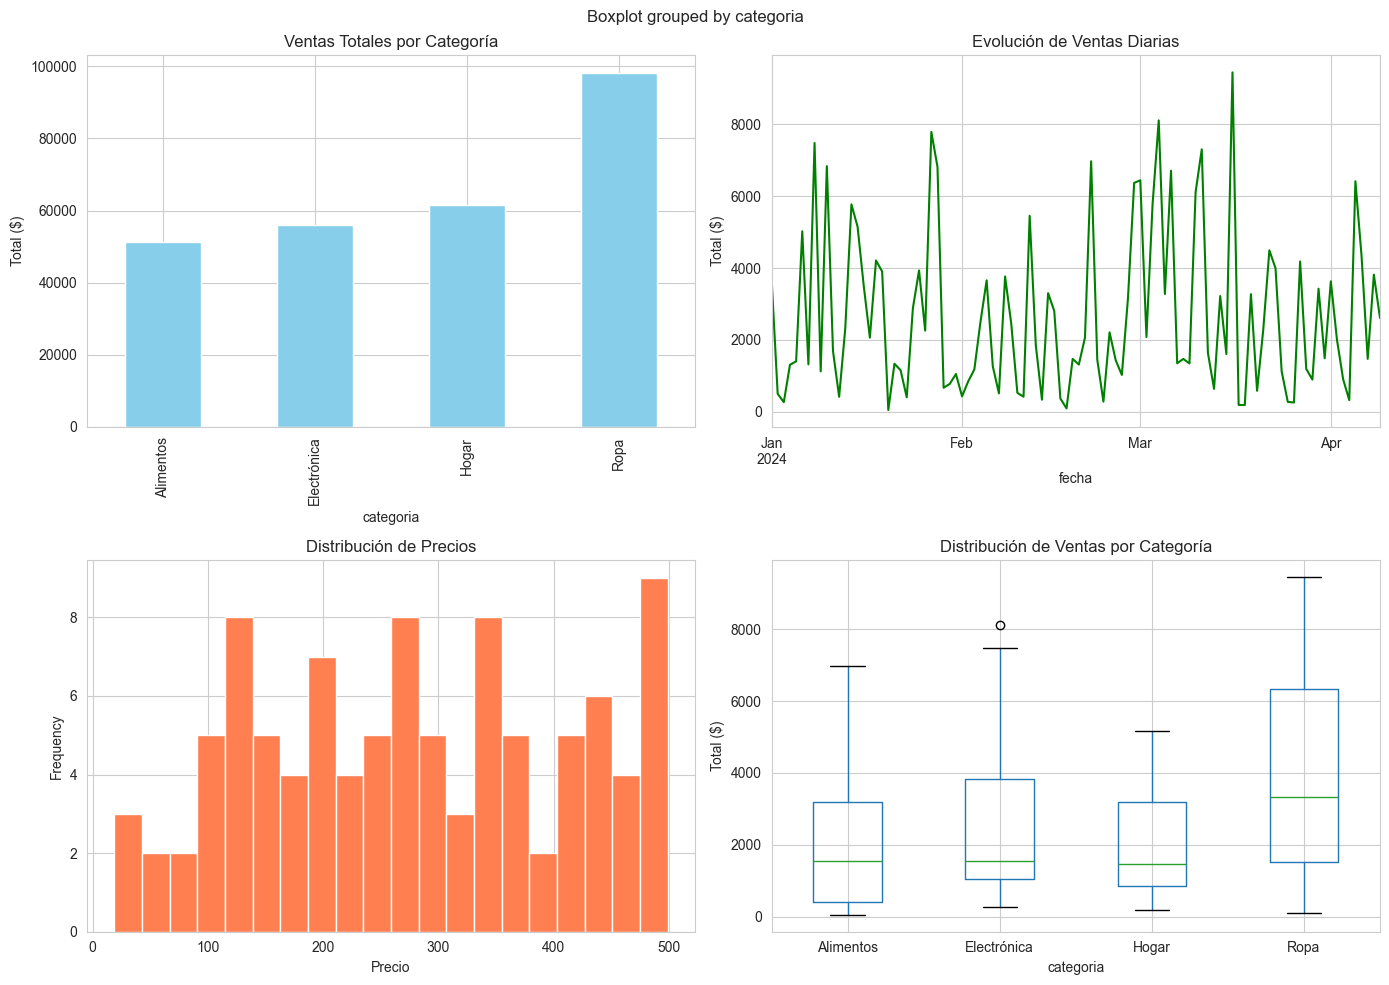

In [32]:
# Gráficos básicos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico de barras
ventas_por_categoria.plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Ventas Totales por Categoría')
axes[0, 0].set_ylabel('Total ($)')

# Gráfico de líneas
df_transacciones.groupby('fecha')['total'].sum().plot(ax=axes[0, 1], color='green')
axes[0, 1].set_title('Evolución de Ventas Diarias')
axes[0, 1].set_ylabel('Total ($)')

# Histograma
df_transacciones['precio'].plot(kind='hist', bins=20, ax=axes[1, 0], color='coral')
axes[1, 0].set_title('Distribución de Precios')
axes[1, 0].set_xlabel('Precio')

# Box plot
df_transacciones.boxplot(column='total', by='categoria', ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Ventas por Categoría')
axes[1, 1].set_ylabel('Total ($)')

plt.tight_layout()
plt.show()

## 10. Ejercicios Prácticos

### 📖 Visualización Rápida con Pandas

**¿Por qué pandas tiene plotting integrado?**
Para **exploración rápida** sin salir del flujo de análisis:
- No necesitas importar matplotlib para gráficos simples
- Sintaxis más corta: `df.plot()` vs configurar matplotlib
- Perfecto para análisis exploratorio (EDA)

**Integración con matplotlib:**
Pandas usa matplotlib por detrás, así que puedes:
- Personalizar con comandos de matplotlib
- Combinar ambas bibliotecas
- Todo lo que funciona en matplotlib funciona aquí

**Tipos de gráficos disponibles:**

| Tipo | Método | Cuándo usar |
|------|--------|-------------|
| **Line** | `.plot()` o `.plot(kind='line')` | Tendencias temporales |
| **Bar** | `.plot(kind='bar')` | Comparar categorías |
| **Histogram** | `.plot(kind='hist')` | Distribución de valores |
| **Box** | `.plot(kind='box')` | Detectar outliers, cuartiles |
| **Scatter** | `.plot(kind='scatter')` | Relación entre 2 variables |
| **Pie** | `.plot(kind='pie')` | Proporciones (evitar si >5 categorías) |
| **Area** | `.plot(kind='area')` | Tendencias apiladas |

**Sintaxis general:**
```python
df['columna'].plot(
    kind='bar',           # Tipo de gráfico
    title='Título',       # Título
    figsize=(10, 6),      # Tamaño (ancho, alto)
    color='steelblue',    # Color
    legend=True           # Mostrar leyenda
)
plt.ylabel('Eje Y')
plt.xlabel('Eje X')
plt.show()
```

**Ejemplos rápidos:**

**Histograma (distribución):**
```python
df['edad'].plot(kind='hist', bins=20, title='Distribución de Edades')
```

**Line chart (temporal):**
```python
df.groupby('fecha')['ventas'].sum().plot(title='Ventas Diarias')
```

**Bar chart (categorías):**
```python
df['categoria'].value_counts().plot(kind='bar', title='Productos por Categoría')
```

**Scatter (correlación):**
```python
df.plot(kind='scatter', x='precio', y='ventas', alpha=0.5)
```

**Box plot (outliers):**
```python
df[['edad', 'salario']].plot(kind='box')
```

**Personalización común:**

```python
# Tamaño de figura
df.plot(figsize=(12, 6))

# Colores personalizados
df.plot(color=['red', 'blue', 'green'])

# Rotación de labels
df.plot(kind='bar')
plt.xticks(rotation=45)

# Grid
df.plot(grid=True)

# Estilo
plt.style.use('ggplot')
df.plot()
```

**Múltiples subplots:**
```python
df.plot(subplots=True, layout=(2, 2), figsize=(12, 8))
```

**Best practices:**
- ✅ **Títulos claros**: Qué muestra el gráfico
- ✅ **Etiquetas con unidades**: "$", "%", "kg", etc.
- ✅ **Tamaño apropiado**: `figsize=(10, 6)` para legibilidad
- ✅ **Colores consistentes**: Usa paletas profesionales
- ⚠️ **No abuses de pie charts**: Barras son más claras
- ⚠️ **Cuidado con histogramas**: Ajusta `bins` según datos

**Cuándo usar pandas.plot vs matplotlib puro:**

| Usa pandas.plot cuando | Usa matplotlib cuando |
|-------------------------|----------------------|
| Exploración rápida | Presentación final |
| Prototipado | Personalización extrema |
| Gráficos simples | Múltiples fuentes de datos |
| Trabajas con Series/DataFrame | Necesitas control total |

**En este bloque aprenderás:**
1. Crear gráficos directamente desde DataFrames con `.plot()`
2. Diferentes tipos con `kind=`: bar, hist, scatter, box
3. Personalizar con parámetros: figsize, title, color
4. Combinar pandas.plot con matplotlib para detalles
5. Cuándo usar cada tipo de gráfico
6. Shortcuts para análisis exploratorio rápido
7. Generar múltiples gráficos con subplots

In [33]:
# Ejercicio 1: Análisis de ventas mensuales
print("=== Ejercicio 1: Análisis de Ventas Mensuales ===")

# Agregar columna de mes
df_transacciones['mes'] = df_transacciones['fecha'].dt.month
df_transacciones['mes_nombre'] = df_transacciones['fecha'].dt.month_name()

# Ventas por mes
ventas_mensuales = df_transacciones.groupby('mes_nombre')['total'].agg([
    ('total', 'sum'),
    ('promedio', 'mean'),
    ('transacciones', 'count')
])

print(ventas_mensuales)

=== Ejercicio 1: Análisis de Ventas Mensuales ===
               total     promedio  transacciones
mes_nombre                                      
April       25528.40  2836.488889              9
February    59587.87  2054.754138             29
January     87226.05  2813.743548             31
March       94433.86  3046.253548             31


In [34]:
# Ejercicio 2: Top 5 productos más vendidos
print("=== Ejercicio 2: Top 5 Productos ===")

top_productos = df_transacciones.groupby('producto').agg({
    'cantidad': 'sum',
    'total': 'sum'
}).sort_values('total', ascending=False).head(5)

print(top_productos)

=== Ejercicio 2: Top 5 Productos ===
             cantidad    total
producto                      
Producto_75        19  9448.32
Producto_63        19  8112.05
Producto_26        19  7790.95
Producto_7         15  7483.35
Producto_70        15  7306.50


In [35]:
# Ejercicio 3: Análisis por región
print("=== Ejercicio 3: Rendimiento por Región ===")

analisis_region = df_transacciones.groupby('region').agg({
    'total': ['sum', 'mean', 'count'],
    'cantidad': 'sum'
})

analisis_region.columns = ['_'.join(col) for col in analisis_region.columns]
analisis_region = analisis_region.sort_values('total_sum', ascending=False)

print(analisis_region)

=== Ejercicio 3: Rendimiento por Región ===
        total_sum   total_mean  total_count  cantidad_sum
region                                                   
Norte    89584.70  3732.695833           24           280
Sur      69660.71  2679.258077           26           228
Oeste    56996.37  2192.168077           26           216
Este     50534.40  2105.600000           24           198


## Resumen y Mejores Prácticas

### Puntos Clave:
1. **Series y DataFrames**: Estructuras fundamentales de pandas
2. **Selección**: Usar `loc` para etiquetas, `iloc` para posiciones
3. **Filtrado**: Combinar condiciones con `&` (AND) y `|` (OR)
4. **Agrupaciones**: `groupby()` para análisis agregado
5. **Datos faltantes**: Detectar con `isnull()`, manejar con `fillna()` o `dropna()`
6. **Duplicados**: Detectar con `duplicated()`, eliminar con `drop_duplicates()`

### Mejores Prácticas:
- Siempre explorar los datos con `head()`, `info()`, `describe()`
- Verificar tipos de datos antes de operaciones
- Manejar valores faltantes apropiadamente según el contexto
- Usar nombres descriptivos para variables
- Documentar transformaciones complejas
- Validar resultados después de cada transformación

### Recursos Adicionales:
- [Documentación oficial de Pandas](https://pandas.pydata.org/docs/)
- [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html)
- [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

---

## 🧭 Navegación

**← Anterior:** [🐍 Junior - 02. Python para Manipulación de Datos](02_python_manipulacion_datos.ipynb)

**Siguiente →:** [SQL Básico para Ingeniería de Datos →](04_sql_basico.ipynb)

**📚 Índice de Nivel Junior:**
- [📊 Junior - 01. Introducción a la Ingeniería de Datos](01_introduccion_ingenieria_datos.ipynb)
- [🐍 Junior - 02. Python para Manipulación de Datos](02_python_manipulacion_datos.ipynb)
- [Pandas: Fundamentos para Análisis de Datos](03_pandas_fundamentos.ipynb) ← 🔵 Estás aquí
- [SQL Básico para Ingeniería de Datos](04_sql_basico.ipynb)
- [Limpieza y Preparación de Datos](05_limpieza_datos.ipynb)
- [📊 Visualización de Datos en Ingeniería de Datos](06_visualizacion_datos.ipynb)
- [🔄 Git y Control de Versiones para Ingeniería de Datos](07_git_control_versiones.ipynb)
- [🌐 APIs REST y Web Scraping para Ingeniería de Datos](08_apis_web_scraping.ipynb)
- [🎯 Proyecto Integrador 1: Pipeline ETL Completo](09_proyecto_integrador_1.ipynb)
- [🚀 Proyecto Integrador 2: Pipeline Near Real-Time, Scheduling y Alertas](10_proyecto_integrador_2.ipynb)

**🎓 Otros Niveles:**
- [Nivel Junior](../nivel_junior/README.md)
- [Nivel Mid](../nivel_mid/README.md)
- [Nivel Senior](../nivel_senior/README.md)
- [Nivel GenAI](../nivel_genai/README.md)
- [Negocio LATAM](../negocios_latam/README.md)
